In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Load the dataset and split the data into features and target variables

In [2]:
X = pd.read_csv("./diabetes.csv")

In [3]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
raw_features = X[X.columns]

In [12]:
raw_features = raw_features.drop(columns=["Outcome"])
raw_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
target = X["Outcome"]

#### Normalize the data using StandardScaler of sklearn

In [14]:
features = StandardScaler().fit_transform(raw_features)

In [33]:
features.shape

(768, 8)

#### Create the covariance matrix. 
You can use np.cov()

In [17]:
Cx = np.cov(features.T)  # needed by the method
print('The Covariance Matrix is:\n', Cx)

The Covariance Matrix is:
 [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


#### Now that we have our covariance matrix, we will use linalg.eig from numpy to compute the eigenvectors and eigenvalues.

In [35]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

#### Order the eigenvalues and their corresponding eigenvectors in desceding order

In [39]:
ordered_id = np.argsort(eig_val_cov)[::-1]
ordered_vals = eig_val_cov[ordered_id]
ordered_vecs = eig_vec_cov[ordered_id]

In [41]:
ordered_id

array([0, 1, 7, 6, 5, 4, 2, 3])

#### Print the explained_variance_ratio created after the eigendecomposition

In [42]:
... #explained_variance_ratio_
ordered_vals / ordered_vals.sum()

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

### Apply PCA to reduce the dimensionality of the data from  8 to 2.

#### We are now ready to use the PCA algorithm. We call the PCA algorithm and pass it to components (features).

In [44]:
pca = PCA(n_components=2).fit(features)
PC = pca.transform(features)
print(pca.explained_variance_ratio_)

[0.26179749 0.21640127]


### We will now plot the Principal Components, with their outcomes. Make a scatter plot where you plot the persons without diabetes in green and persons with diabetes in red. 

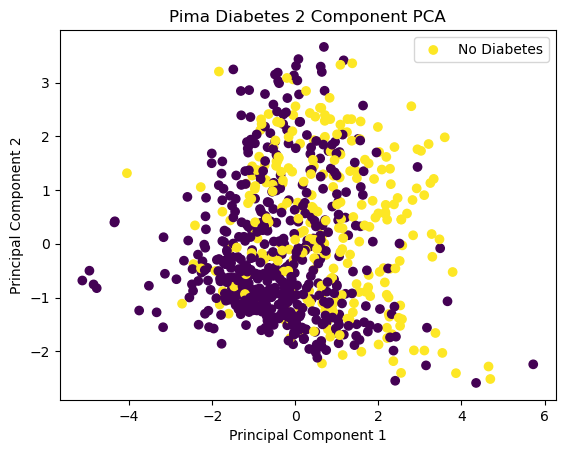

In [46]:
plt.scatter(PC[:, 0], PC[:, 1], c=target)
plt.title("Pima Diabetes 2 Component PCA")
plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

### Do you see any explanation for the selected components?

I.e. which features are "weighted" the highest in each?

In [47]:
df = pd.DataFrame( columns = raw_features.columns)
df.loc[0] = pca.components_[0,:]
df.loc[1] = pca.components_[1,:]

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.128432,0.393083,0.360003,0.439824,0.435026,0.451941,0.270611,0.198027
1,0.593786,0.174029,0.183892,-0.331965,-0.250781,-0.100960,-0.122069,0.620589
